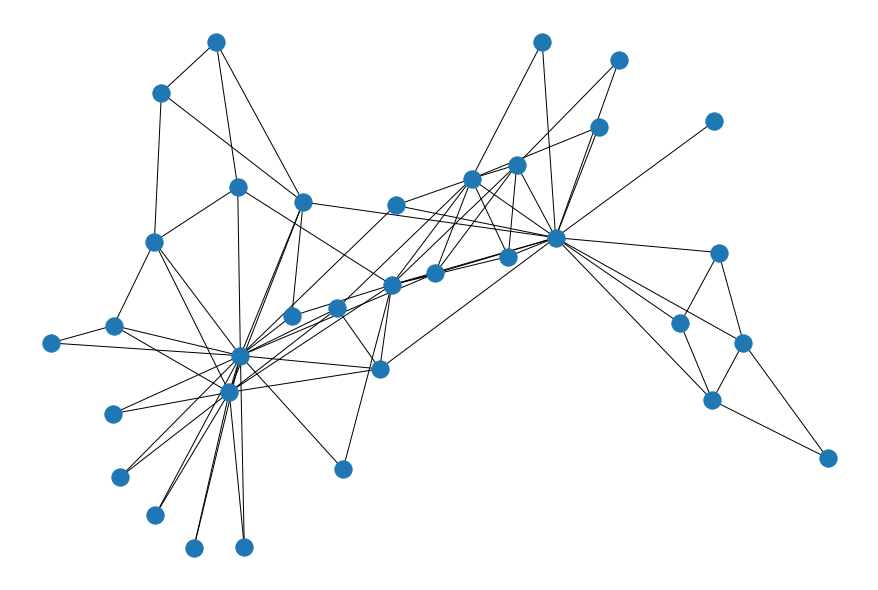

In [3]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
plt.figure(figsize=(12,8))
nx.draw(G_karate)

In [4]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("nodes :", str(n))
print("edges :", str(m))
print("connected components :", str(nx.number_connected_components(G_karate)))

nodes : 34
edges : 78
connected components : 1


In [5]:
# Take a 25% random sample of edges
edge_subset = random.sample(G_karate.edges(), int(0.25 * G_karate.number_of_edges()))
# Removing the 25% 
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

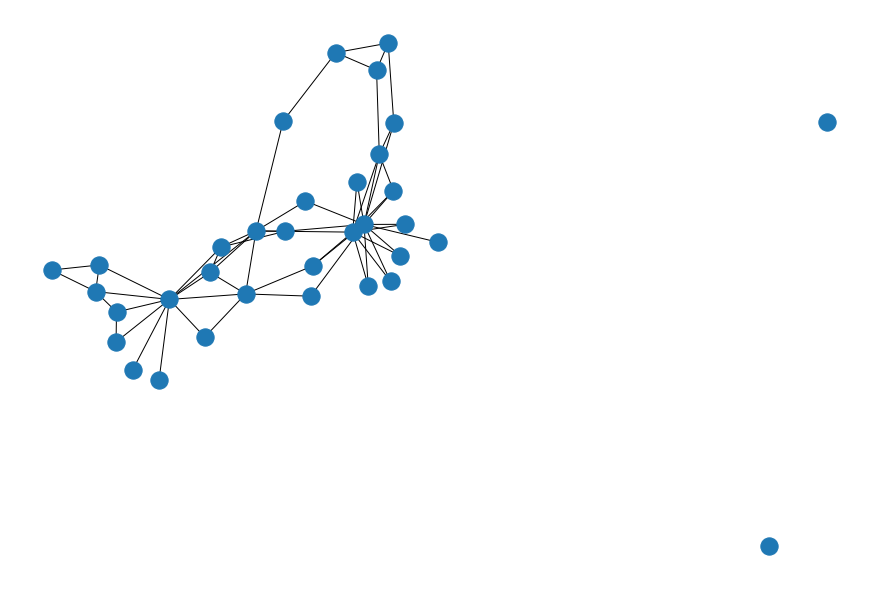

In [6]:
# Plot
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)

In [7]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((m - edge_subset_size)))

Deleted :  19
Remaining :  59


In [8]:
# Get the Jaccard Coefficient
prediction_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])
#print(prediction_jaccard)

In [9]:
# Adamic Adar Index 
prediction_adamic = list(nx.adamic_adar_index(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])
#print(prediction_adamic)

In [10]:
# Preferential Attachment score 
prediction_pref = list(nx.preferential_attachment(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])
#print(prediction_pref)

In [11]:
from node2vec import Node2Vec

node2vec = Node2Vec(G_karate, dimensions=64, walk_length=30, num_walks=200, workers=4)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

print(model.wv.get_vector('2'))

Computing transition probabilities: 100%|██████████| 34/34 [00:00<00:00, 1962.84it/s]


[ 0.2264234   0.22831938  0.26057246 -0.27791336 -0.06806744 -0.03584119
 -0.3024562   0.19822259 -0.00403272 -0.17643045  0.321653   -0.26295635
 -0.34424692  0.18337776  0.46488422  0.41308272 -0.08163177  0.46427885
 -0.23252742  0.01310471 -0.04112177 -0.11235177 -0.3394299  -0.31580275
 -0.11911184  0.5310304   0.24072379 -0.19728917  0.03364926 -0.39707068
 -0.02384493 -0.29053366 -0.55111945 -0.14252672  0.3837112  -0.29371744
 -0.01203253  0.5755167  -0.05070503 -0.68654126 -0.53898     0.53085876
 -0.11400878  0.4653297  -0.09887674  0.03406745  0.12507586  0.23947419
 -0.03816433  0.41610792  0.01508988  0.08151087 -0.02988579  0.04122644
  0.18820366  0.07940762  0.12270674 -0.35877255  0.3713403  -0.00170614
 -0.7862317  -0.11144378  0.4498145   0.01546124]


In [12]:
# List of the most similar nodes and the corresponding probabilities :

print(model.wv.most_similar('2'))

[('3', 0.6225093603134155), ('13', 0.6130359172821045), ('7', 0.582851231098175), ('12', 0.5148569345474243), ('9', 0.48412826657295227), ('1', 0.32514259219169617), ('11', 0.14481790363788605), ('28', 0.1350300908088684), ('19', 0.13391166925430298), ('17', 0.13209128379821777)]


In [13]:
# Edge embedding for further classification

from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
print(edges_embs[('1', '2')])


[-0.0077929   0.13057223  0.1255988   0.00122494  0.02458514 -0.01690441
  0.15091416 -0.05813717  0.00047013  0.06096534  0.17793113  0.05833742
 -0.15627171 -0.05580759  0.06422605  0.32019198 -0.00801601  0.09787759
 -0.09783062  0.00868728  0.02513565  0.02836909  0.12738165  0.29363024
 -0.05406702  0.19670789  0.03386632  0.07029465  0.02126396 -0.13273478
 -0.0018145   0.04207423  0.04296537 -0.06019561 -0.06585495  0.01108641
  0.00253354  0.4359432   0.01324647 -0.00669011 -0.17276205  0.29761377
  0.05174794  0.06414994  0.01210627 -0.00131624  0.07404003 -0.01533391
 -0.02762486 -0.01019889  0.00224428  0.04039646 -0.00634809  0.01407802
  0.12623993  0.00533965  0.04526059  0.24804062 -0.19520172  0.0005265
  0.16236797  0.01170115 -0.03905688 -0.00570152]


In [14]:
# Retrieve the most similar edges
edges_kv = edges_embs.as_keyed_vectors()
most_sim = edges_kv.most_similar(str(('1', '2')))
print(most_sim)

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 83459.66it/s]

[("('2', '7')", 0.8129869103431702), ("('17', '2')", 0.7504829168319702), ("('19', '2')", 0.7395340204238892), ("('13', '2')", 0.7373499870300293), ("('1', '3')", 0.7158470153808594), ("('1', '7')", 0.7136228084564209), ("('1', '13')", 0.7106428146362305), ("('2', '21')", 0.7026609778404236), ("('19', '3')", 0.6903088688850403), ("('2', '3')", 0.6896499395370483)]
